# Analysis - Comparison of fee estimation algorithms

Analysis of the naive algorithm based on go-ethereum's suggest gas price, the core algorithm from bitcoin core and the newly introduced mempool algorithm.

In [31]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [67]:
def preprocess(df):
    df = df.replace(-1.00, np.nan)
    df = df.sort_values(by=['block_number'])
    return df

dfnaive = pd.read_csv('data/feeestimation/naivescores2019-01-11.csv')
dfmempool = pd.read_csv('data/feeestimation/mempoolscores2019-01-11.csv')
dfcore = pd.read_csv('data/feeestimation/corescores2019-01-11.csv')
dfbtcutil = pd.read_csv('data/feeestimation/btcutilscores2019-01-11.csv')

dfnaive = preprocess(dfnaive)
dfmempool = preprocess(dfmempool)
dfcore = preprocess(dfcore)
dfbtcutil = preprocess(dfbtcutil)

In [68]:
def stats(df):
    avg_ratestandard = df["priceStandard"].mean()
    std_ratestandard = df["priceStandard"].std()
    print("The average standard fee-per-byte-rate is: " + str(avg_ratestandard) + " Satoshi per byte. std: " + str(std_ratestandard))

print("\n############### naive ###################")
stats(dfnaive)

print("\n############### mempool ###################")
stats(dfmempool)

print("\n############### core ###################")
stats(dfcore)

print("\n############### btcutils ###################")
stats(dfbtcutil)


############### naive ###################
The average standard fee-per-byte-rate is: 18.5 Satoshi per byte. std: 17.429493223916555

############### mempool ###################
The average standard fee-per-byte-rate is: 16.870008875739646 Satoshi per byte. std: 13.96573984935923

############### core ###################
The average standard fee-per-byte-rate is: 7.723588235294118 Satoshi per byte. std: 6.652897471557699

############### btcutils ###################
The average standard fee-per-byte-rate is: 3.255833333333333 Satoshi per byte. std: 1.2536763861268487


In [47]:
groupedMempool = dfmempool.groupby(['block_number']).mean().reset_index()
print(groupedMempool['block_number'])


0     557912
1     557915
2     557916
3     557917
4     557918
5     557919
6     557924
7     557925
8     557926
9     557927
10    557933
11    557934
12    557935
13    557938
14    557939
15    557941
16    557942
17    557943
18    557946
19    557947
20    557948
21    557949
22    557952
23    557953
24    557954
25    557956
26    557959
27    557960
28    557961
29    557962
30    557963
31    557966
32    557967
33    557968
34    557971
35    557972
36    557974
37    557975
38    557976
39    557979
40    557980
41    557981
42    557982
43    557984
44    557985
45    557986
46    557987
47    557988
48    557989
49    557991
50    557992
51    557993
52    557994
Name: block_number, dtype: int64


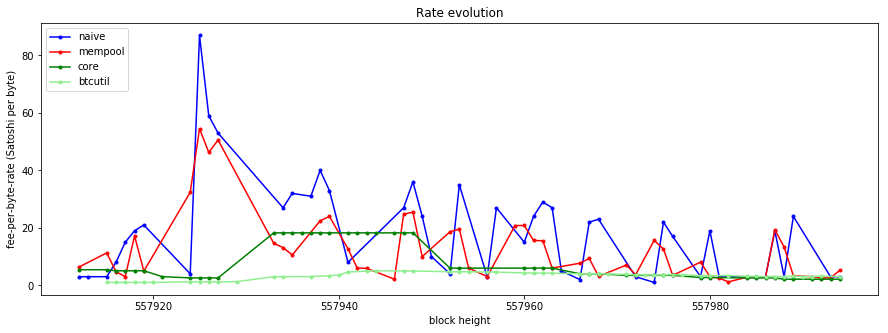

In [72]:
import matplotlib.pyplot as plt

x2 = dfnaive["block_number"].values
x3 = groupedMempool["block_number"].values
x4 = dfcore["block_number"].values
x5 = dfbtcutil["block_number"].values
y2 = dfnaive["priceStandard"].values
y3 = groupedMempool["priceStandard"].values
y4 = dfcore["priceStandard"].values
y5 = dfbtcutil["priceStandard"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.plot(x2,y2, c='b', marker='.', label='naive')
ax.plot(x3,y3, c='r', marker='.', label='mempool')
ax.plot(x4,y4, c='g',marker='.', label='core')
ax.plot(x5,y5, c='lightgreen',marker='.', label='btcutil')

plt.xlabel('block height')
ax.ticklabel_format(useOffset=False)
plt.ylabel('fee-per-byte-rate (Satoshi per byte)')
plt.title('Rate evolution')
plt.legend(loc=2)

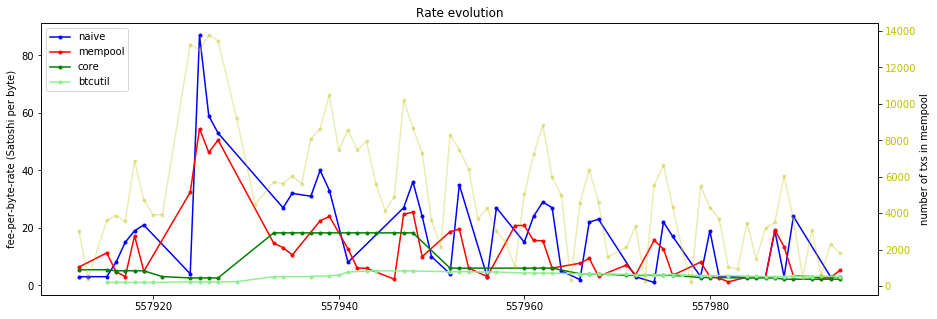

In [73]:
lines = [line.rstrip('\n') for line in open('data/mempool/mempoolcache557994.csv')]
poolRates = [line.split(',') for line in lines[1:]]

byHeight = {}
for poolRate in poolRates:
    rates = list(map(float, poolRate[1:]))
    byHeight[poolRate[0]]= rates

stats = {'height': [],
         'numberOfRates': [],
         'averageRate': [],
         'std': [],
         'medianRate': [],}

for height, rates in byHeight.items():
    stats['height'].append(int(height))
    stats['numberOfRates'].append(len(rates))
    stats['averageRate'].append(np.mean(rates))
    stats['std'].append(np.std(rates))
    stats['medianRate'].append(np.median(rates))
    
df = pd.DataFrame.from_dict(stats)
df = df.sort_values(by=['height'])

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax2 = ax.twinx()
x1 = df["height"].values
y1 = df["numberOfRates"].values
ax2.plot(x1,y1, c='y', marker='.', alpha=0.3)
ax2.set_ylabel('number of txs in mempool')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor="y")

x2 = dfnaive["block_number"].values
x3 = groupedMempool["block_number"].values
x4 = dfcore["block_number"].values
x5 = dfbtcutil["block_number"].values
y3 = groupedMempool["priceStandard"].values
y4 = dfcore["priceStandard"].values
y2 = dfnaive["priceStandard"].values
y5 = dfbtcutil["priceStandard"].values

ax.plot(x2,y2, c='b', marker='.', label='naive')
ax.plot(x3,y3, c='r', marker='.', label='mempool')
ax.plot(x4,y4, c='g', marker='.', label='core')
ax.plot(x5,y5, c='lightgreen',marker='.', label='btcutil')
ax.set_ylabel('fee-per-byte-rate (Satoshi per byte)')


plt.xlabel('block height')
ax.ticklabel_format(useOffset=False)

plt.title('Rate evolution')
ax.legend(loc=2)